c:\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


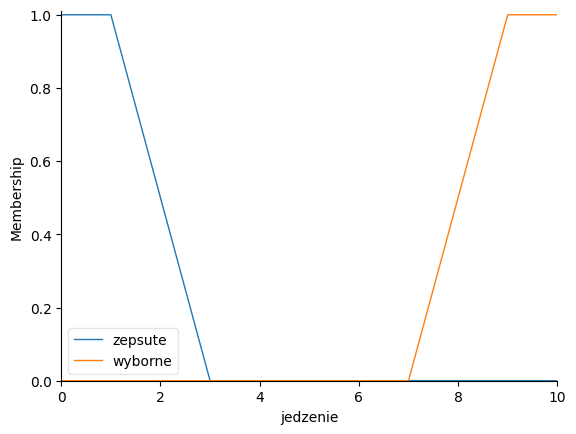

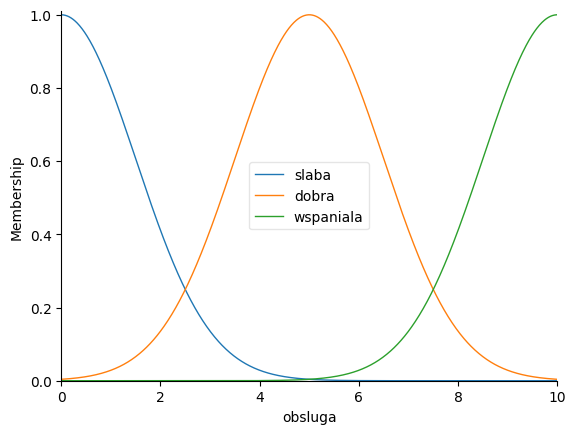

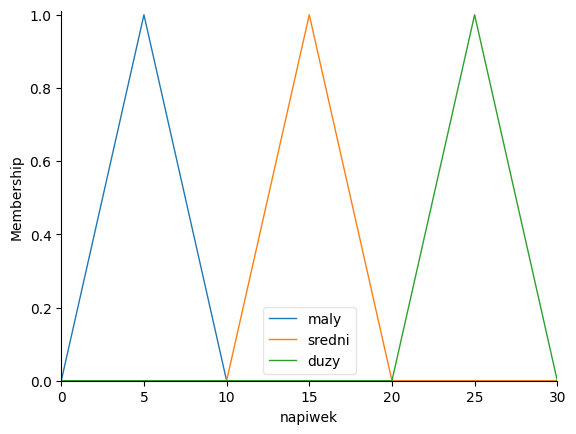

In [15]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

obsluga = ctrl.Antecedent(np.arange(0,10.01,0.01), 'obsluga')
napiwek = ctrl.Consequent(np.arange(0,30.01,0.01), 'napiwek')


obsluga['slaba'] = fuzz.gaussmf(obsluga.universe,  0, 1.5)
obsluga['dobra'] = fuzz.gaussmf(obsluga.universe,  5, 1.5)
obsluga['wspaniala'] = fuzz.gaussmf(obsluga.universe,  10, 1.5)


napiwek['maly'] = fuzz.trimf(napiwek.universe, [0, 5, 10])
napiwek['sredni'] = fuzz.trimf(napiwek.universe, [10, 15, 20])
napiwek['duzy'] = fuzz.trimf(napiwek.universe, [20, 25,30])



regula1 = ctrl.Rule(obsluga['slaba'], napiwek['maly'])
regula2 = ctrl.Rule(obsluga['dobra'], napiwek['sredni'])
regula3 = ctrl.Rule(obsluga['wspaniala'], napiwek['duzy'])


#do zad 9 zakomentuj
jedzenie = ctrl.Antecedent(np.arange(0,10.01,0.01), 'jedzenie')
jedzenie['zepsute'] = fuzz.trapmf(jedzenie.universe,  [-2, 0, 1, 3])
jedzenie['wyborne'] = fuzz.trapmf(jedzenie.universe, [7, 9, 10, 12])
regula4 = ctrl.Rule(jedzenie['zepsute'], napiwek['maly'])
regula5 = ctrl.Rule(jedzenie['wyborne'], napiwek['duzy'])
jedzenie.view()


obsluga.view()
napiwek.view()



napiwek_ctr = ctrl.ControlSystem([regula1,regula2,regula3, regula4, regula5]) #do 9 usun regułe 4,5
napiwek_sym = ctrl.ControlSystemSimulation(napiwek_ctr)

In [16]:
# do zad 9
# napiwek_sym.input['obsluga'] = 0  #10
# napiwek_sym.compute()
# print('Wynik',napiwek_sym.output['napiwek'])
# napiwek.view(sim=napiwek_sym)

In [17]:
# do zad 9 
# n_points = 21
# x = np.linspace(0, 10, n_points)
# z = np.zeros_like(x)
# for i in range(n_points):
#     napiwek_sym.input['obsluga'] = x[i]
#     napiwek_sym.compute()
#     z[i] = napiwek_sym.output['napiwek']
# fig, ax = plt.subplots()
# ax.set_xlabel('obsługa')
# ax.set_ylabel('napiwek')
# ax.plot(x,z)
# fig.show()


Wynik 5.076578013816947


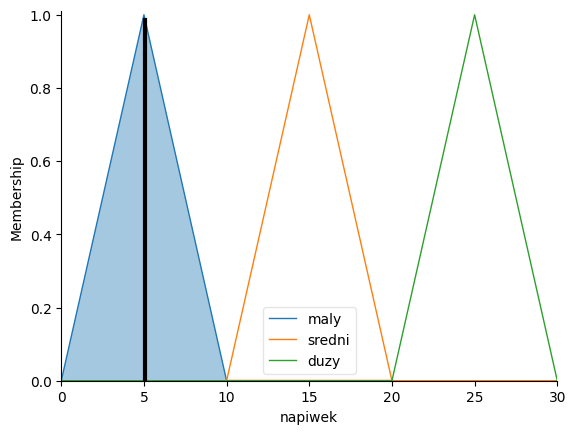

In [18]:
napiwek_sym.input['obsluga'] = 0
napiwek_sym.input['jedzenie'] = 0
napiwek_sym.compute()
print('Wynik',napiwek_sym.output['napiwek'])
napiwek.view(sim=napiwek_sym)

Wynik 24.923421986182834


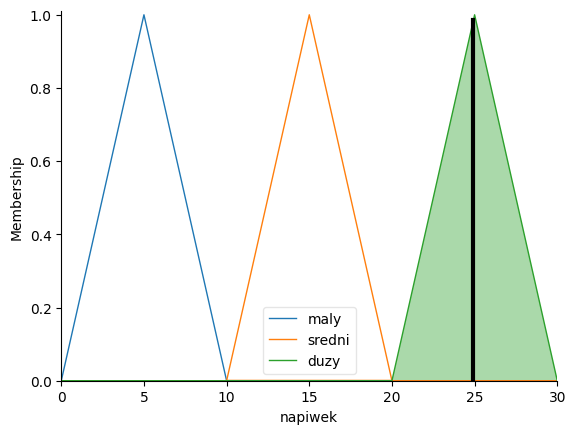

In [19]:
napiwek_sym.input['obsluga'] = 10
napiwek_sym.input['jedzenie'] = 10
napiwek_sym.compute()
print('Wynik',napiwek_sym.output['napiwek'])
napiwek.view(sim=napiwek_sym)


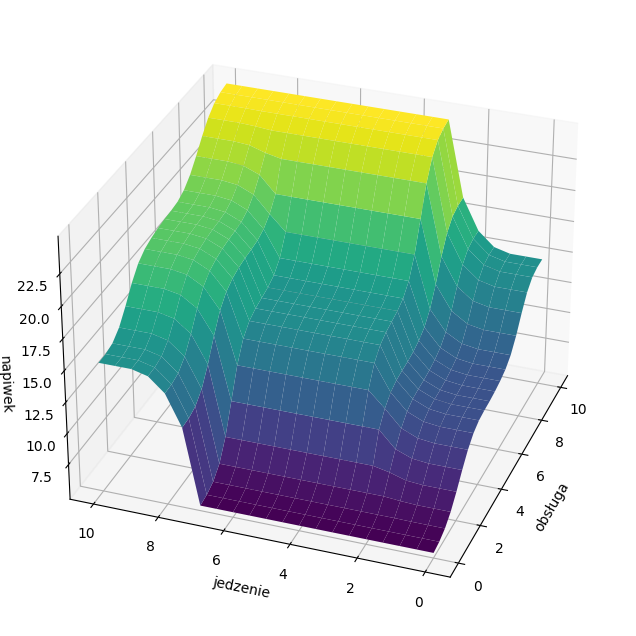

In [24]:
n_points = 21
upsampled = np.linspace(0, 10, n_points)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)
# Loop through the system 21*21 times to collect the control surface
for i in range(n_points):
    for j in range(n_points):
        napiwek_sym.input['obsluga'] = x[i, j]
        napiwek_sym.input['jedzenie'] = y[i, j]
        napiwek_sym.compute()
        z[i, j] = napiwek_sym.output['napiwek']
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap='viridis')
ax.set_xlabel('obsługa')
ax.set_ylabel('jedzenie')
ax.set_zlabel('napiwek')
ax.view_init(30, 200)
